Playing with starspot fitting codes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.timeseries import LombScargle
import scipy.signal as signal

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [7]:
lcf = Table.read('gd394_2sector_lc.csv', format='csv')
lc = lk.LightCurve(time=lcf['time'], flux=lcf['flux'], flux_err=lcf['flux_err'])

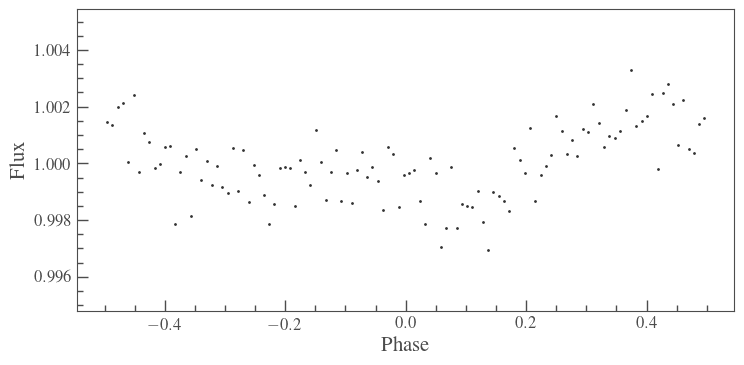

In [8]:
period = 1.1458142776450486
lc.fold(period).bin(300).scatter()

In [9]:
import pymacula

In [14]:
help(pymacula.macula)

Help on function macula in module pymacula.macula:

macula(t, theta_star, theta_spot, theta_inst, derivatives=False, temporal=False, tdeltav=False, full_output=False, tstart=None, tend=None)
    Wrapper for macula FORTRAN routine.
    
    Parameters
    ----------
    theta_star : array_like
        Array of 12 parameters describing star:
        ! ------------------------------------------------------------------------------
        ! Theta_star(j) = Parameter vector for the star's intrinsic parameters
        ! ------------------------------------------------------------------------------
        ! Istar         = Theta_star(1)         ! Inclination of the star [rads]
        ! Peq           = Theta_star(2)         ! Rot'n period of the star's equator [d]
        ! kappa2        = Theta_star(3)         ! Quadratic differential rotation coeff
        ! kappa4        = Theta_star(4)         ! Quartic differential rotation coeff
        ! c1            = Theta_star(5)         ! 1st of 